# __Humidity Predictor__

In [26]:
import glob, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Training files
files = glob.glob('../data/WHT_data/WHT_weather_set_parts_*')
files = sorted(files)
WHT_parts = [pd.read_csv(file_path) for file_path in files]

# Concatenate the DataFrames into a single training set
WHT_data = pd.concat(WHT_parts, ignore_index=True)

/tmp/ipykernel_7203/3604653322.py:6: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_7203/3604653322.py:6: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_7203/3604653322.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_7203/3604653322.py:6: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_7203/3604653322.py:6: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_pa

In [27]:
WHT_data['sampletime'] = pd.to_datetime(WHT_data['sampletime'])

# Extract year
WHT_data['year'] = WHT_data['sampletime'].dt.year

# Extract month
WHT_data['month'] = WHT_data['sampletime'].dt.month

# Extract day
WHT_data['day'] = WHT_data['sampletime'].dt.day

# Extract hour
WHT_data['hour'] = WHT_data['sampletime'].dt.hour

# Extract minute
WHT_data['minute'] = WHT_data['sampletime'].dt.minute

# Extract second
WHT_data['second'] = WHT_data['sampletime'].dt.second

# Drop the 'sampletime' column
WHT_data.drop(columns=['sampletime'], inplace=True)

WHT_data.head()

,windspeed,airtemperature,relativehumidity,localwetness,localbattery,winddirection,airpressure,dewpoint,year,month,day,hour,minute,second
0,7.1742,9.3159,32.342,-0.025,11.995,NaN,NaN,NaN,2020,1,31,16,59,31
1,6.7829,9.322,32.324,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,37
2,7.0003,9.3159,32.36,-0.025,11.995,NaN,NaN,NaN,2020,1,31,16,59,43
3,7.2612,9.3159,32.434,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,49
4,6.9134,9.3159,32.489,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,55


In [29]:
# Convert the numeric values into float32
# We need to convert each category into float32
columns = WHT_data.columns

# There are some missing values with '\\N' in the variables. Let's transform into an arbitrary number
for ii in columns:
    WHT_data[ii][WHT_data[ii] == '\\N'] = -1
    # Converting into float32
    WHT_data[ii] = WHT_data[ii].astype('float32')

# Displaying the type of each column
print(WHT_data.dtypes)
print('\n')

# Now we can count the number of NaNs in each category
print(WHT_data.isna().sum())

/tmp/ipykernel_7203/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1


windspeed           float32
airtemperature      float32
relativehumidity    float32
localwetness        float32
localbattery        float32
winddirection       float32
airpressure         float32
dewpoint            float32
year                float32
month               float32
day                 float32
hour                float32
minute              float32
second              float32
dtype: object


windspeed                 0
airtemperature            0
relativehumidity          0
localwetness        6334884
localbattery        6334884
winddirection       5557582
airpressure         5557582
dewpoint            5557582
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64


In [38]:
# Deleting the columns with more than 30% of NaNs

dim = len(WHT_data) # Dimension of the DataFrame

for ii in columns:
    nans = WHT_data[ii].isna().sum()*100/dim
    # Applying the condition over the column
    if nans > 30:
        WHT_data.drop(ii, axis=1, inplace=True)

## Data Visualization

#### Mean temperature, humidity and wind speed by month

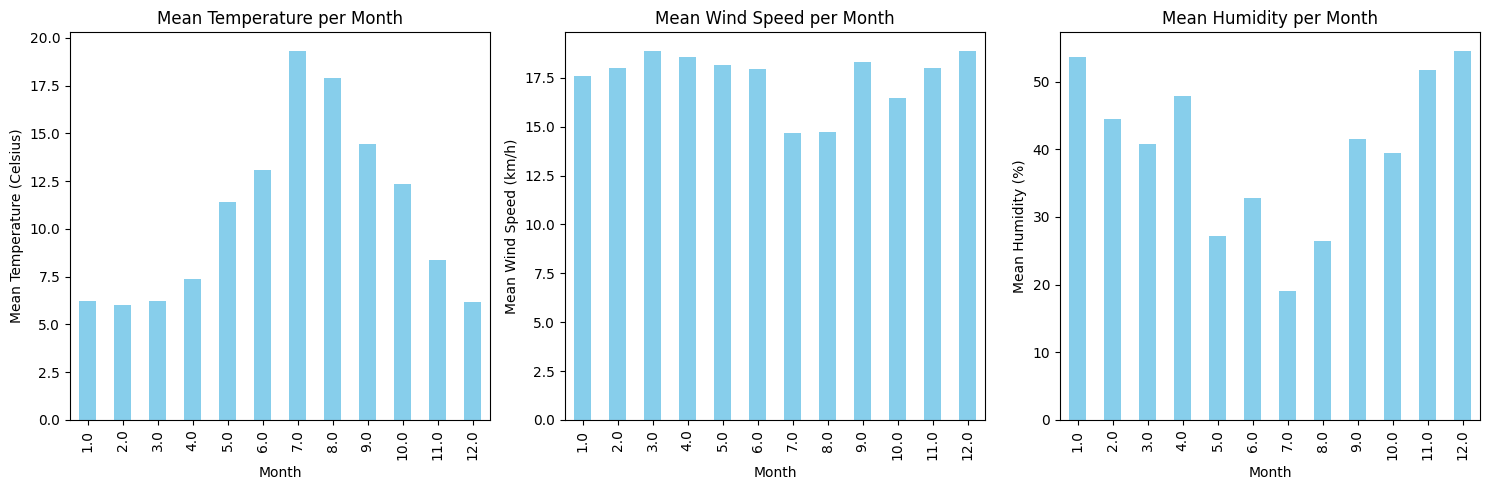

In [40]:
# Group by month and calculate mean temperature
mean_temp_per_month = WHT_data.groupby('month')['airtemperature'].mean()
mean_wind_per_month = WHT_data.groupby('month')['windspeed'].mean()
mean_humi_per_month = WHT_data.groupby('month')['relativehumidity'].mean()

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.ravel()

# Plotting the mean temperature per month
mean_temp_per_month.plot(kind='bar', color='skyblue', ax=ax[0])
mean_wind_per_month.plot(kind='bar', color='skyblue', ax=ax[1])
mean_humi_per_month.plot(kind='bar', color='skyblue', ax=ax[2])

ax[0].set_title('Mean Temperature per Month'); ax[1].set_title('Mean Wind Speed per Month'); ax[2].set_title('Mean Humidity per Month')
ax[0].set_xlabel('Month'); ax[1].set_xlabel('Month'); ax[2].set_xlabel('Month')
ax[0].set_ylabel('Mean Temperature (Celsius)'); ax[1].set_ylabel('Mean Wind Speed (km/h)'); ax[2].set_ylabel('Mean Humidity (%)')
#plt.xticks(rotation=45, ax=ax[0])  # Rotate x-axis labels for better readability
#ax[0].set_grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Correlation map

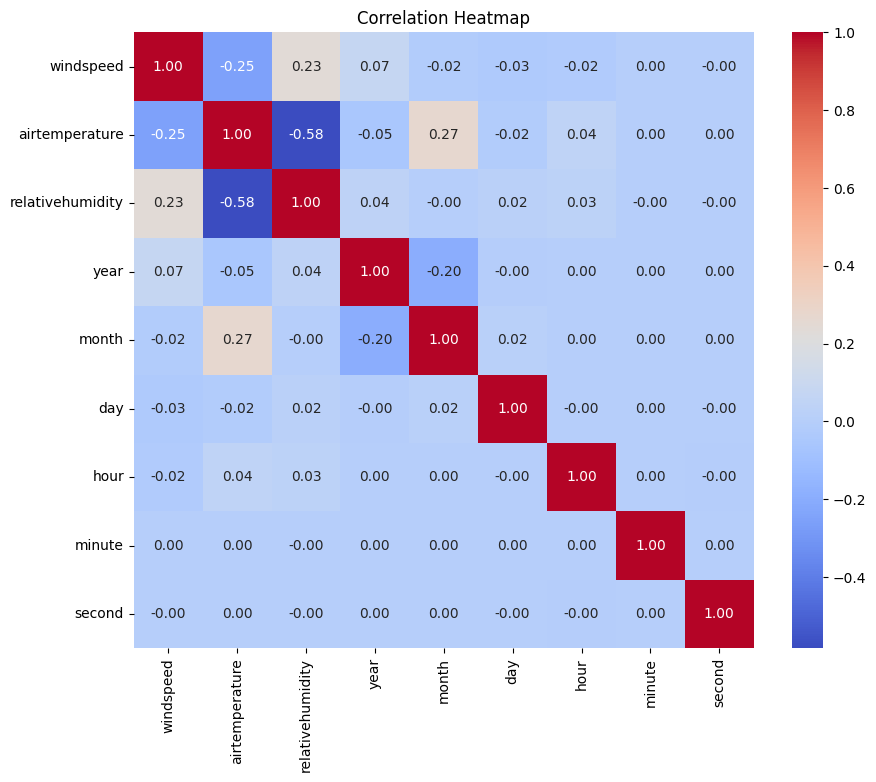

In [41]:
# Assuming combined is your DataFrame
correlation_matrix = WHT_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()